In [4]:
import pymc3 as pm
import theano.tensor as T
import numpy as np
import arviz as az

In [5]:
C = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35])
ID = np.array(list(range(15)))
Q = 40
ID

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [6]:
with pm.Model() as Emil: 
    
    # priors 
    zi = pm.Bernoulli("zi", 0.5, shape = len(ID)) # for each participant (shape?)
    ϕ = pm.Uniform("ϕ", lower = 0.5, upper = 1)
    ψ = 0.5
    
    # deterministic?
    θ = pm.Deterministic("θ", T.eq(zi, 1) * ϕ + ψ * T.eq(zi, 0)) #great. 
    
    # likelihood 
    ki = pm.Binomial("ki", p = θ, n = Q, observed = C) #Again: theta for each participant?
    

In [7]:
with Emil: 
    trace_Rønnn = pm.sample(2000)

C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [zi]
>NUTS: [ϕ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 75 seconds.
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The acceptance probability does not match the target. It is 0.7166540335476231, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:248: RuntimeWarning: divide by zero encountered in double_scalars
  t_j = np.power((c1 * (c2 / (N * f))), (2.0 / (3.0 + 2.0 * j)))
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:252: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi ** 0.5 * f) ** (-0.4)
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:276: RuntimeWarning: invalid value encountered in double_scalars
  bw = (_bw_silverman(x) / np.ptp(x)) ** 2
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-p

array([[<AxesSubplot:title={'center':'zi'}>,
        <AxesSubplot:title={'center':'zi'}>],
       [<AxesSubplot:title={'center':'ϕ'}>,
        <AxesSubplot:title={'center':'ϕ'}>],
       [<AxesSubplot:title={'center':'θ'}>,
        <AxesSubplot:title={'center':'θ'}>]], dtype=object)

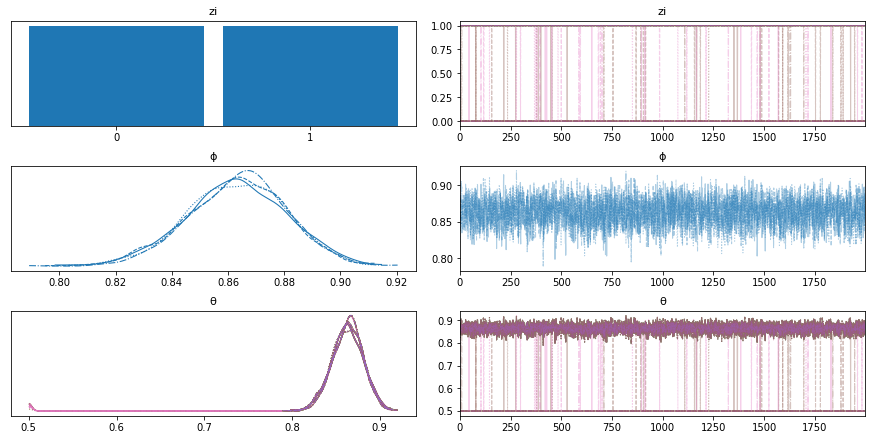

In [8]:
az.plot_trace(trace_Rønnn)

In [9]:
az.summary(trace_Rønnn)

C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_va

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
zi[0],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[1],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[2],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[3],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[4],0.000,0.000,0.000,0.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[5],0.993,0.082,1.000,1.000,0.001,0.001,5262.0,5262.0,5262.0,8000.0,1.0
zi[6],0.994,0.079,1.000,1.000,0.001,0.001,6065.0,6065.0,6065.0,8000.0,1.0
zi[7],1.000,0.000,1.000,1.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[8],1.000,0.000,1.000,1.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
zi[9],1.000,0.000,1.000,1.000,0.000,0.000,8000.0,8000.0,8000.0,8000.0,NaN
